<a href="https://colab.research.google.com/github/bipin-a/Machine-Learning-Notes/blob/main/Feature_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks
from sklearn.preprocessing import PowerTransformer
from datetime import timedelta
from math import log2
from scipy.signal import peak_prominences
import tensorflow as tf
import json
import random
import gc
from sklearn.model_selection import train_test_split
from typing import Union
from collections import namedtuple

import numpy.typing as npt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_dir = "/content/drive/Shareddrives/BipinA/Neural_Networks_Data/"

In [5]:
daily_features = pd.concat([pd.read_csv(f"{data_dir}daily_features.csv"),pd.read_csv(f"{data_dir}daily_features_pt2.csv")])
weekly_features = pd.read_csv(f"{data_dir}weekly_features.csv")
monthly_features = pd.concat([pd.read_csv(f"{data_dir}monthly_features_1.csv"),
                              pd.read_csv(f"{data_dir}monthly_features_2.csv"),
                              pd.read_csv(f"{data_dir}monthly_features_3.csv"),
                              pd.read_csv(f"{data_dir}monthly_features_4.csv"),
                              pd.read_csv(f"{data_dir}monthly_features_5.csv"),
                              ])
all_features = pd.concat([daily_features,weekly_features,monthly_features])
del daily_features, weekly_features, monthly_features

In [6]:
all_features.shape

(14586, 17)

In [7]:
all_features['FREQ']=all_features['V1'].apply(lambda x :x[0])


In [8]:
features = ["FREQ","forecast_error","ptLambda","f_mean","f_variance","f_autocorr1","f_trend_strength","f_linearity","f_all_seasonality_strength","f_peak","f_trough","f_entropy","f_lumpiness","f_level_shift","f_variance_change","f_cross_points"]

(array([ 668.,    0.,    0.,    0.,    0.,  135.,    0.,    0.,    0.,
        2844.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

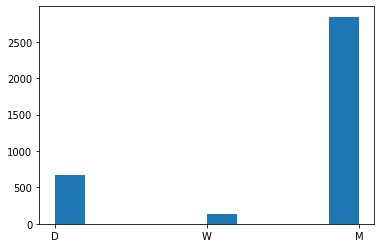

In [ ]:
poor_seasonal = all_features[all_features.forecast_error > all_features.forecast_error.quantile(0.75)]

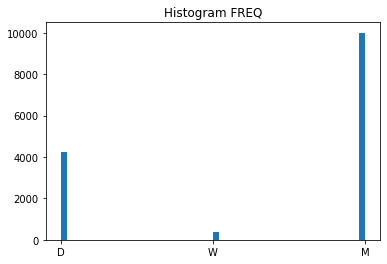

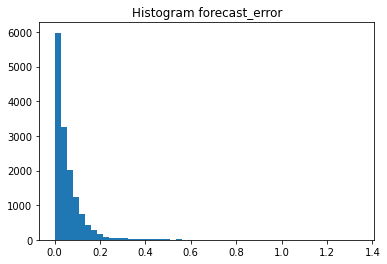

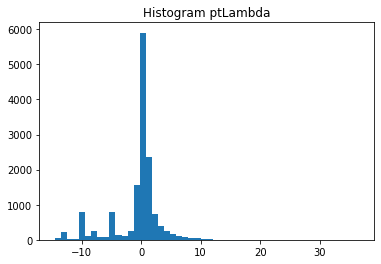

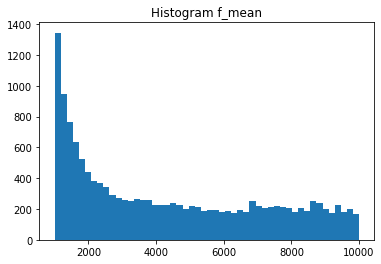

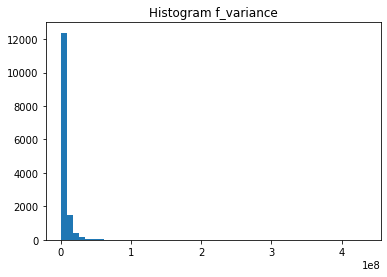

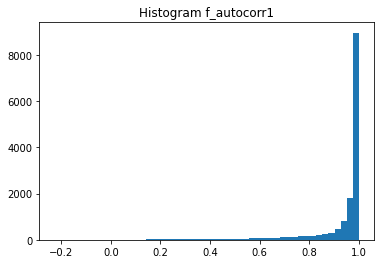

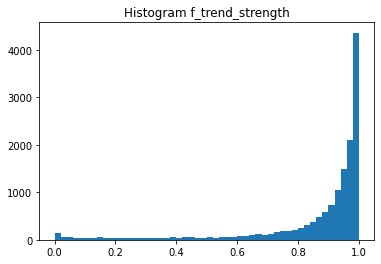

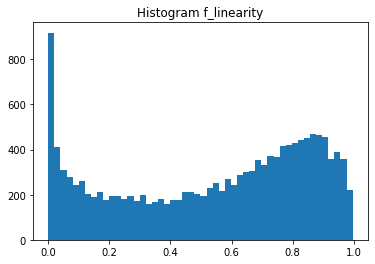

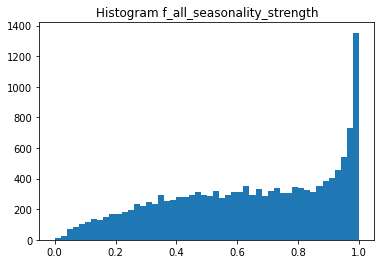

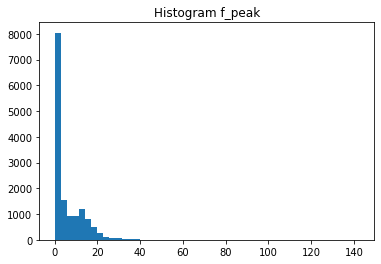

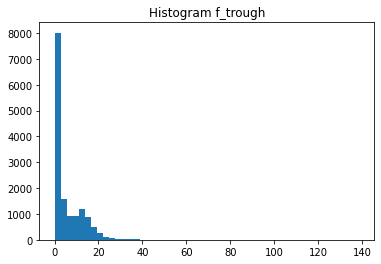

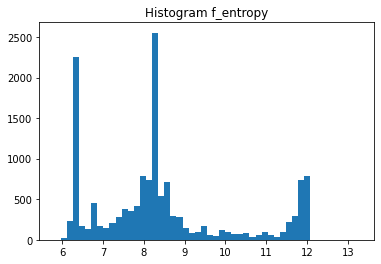

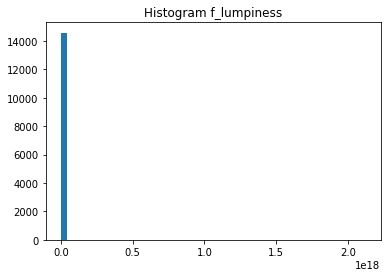

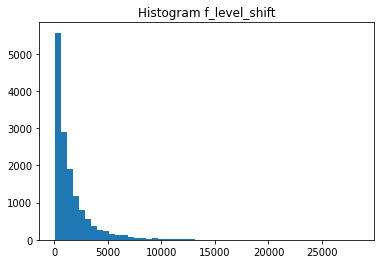

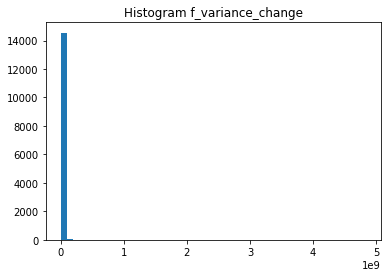

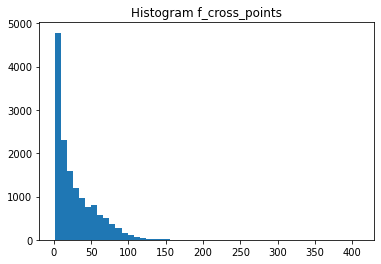

In [11]:
for col in features:
  fig,ax = plt.subplots()
  _ = ax.hist(all_features[col], bins = 50)
  ax.set_title(f"Histogram {col}")
  fig.savefig(f"{data_dir}/imgs/Histogram_{col}.png")


In [ ]:
all_features

,V1,ptLambda,f_mean,f_variance,f_autocorr1,f_trend_strength,f_linearity,f_all_seasonality_strength,f_peak,f_trough,f_entropy,f_lumpiness,f_level_shift,f_variance_change,f_cross_points,forecast_error,fit_forecast,FREQ
0,D1,-0.265874,1430.834216,1.034797e+05,0.999746,0.998701,0.973209,0.895773,0.689458,0.684915,9.958312,1.364944e+05,91.233333,1.802607e+03,7,0.006629,"{""ds"":{""0"":762523200000,""1"":762609600000,""2"":7...",D
1,D2,-4.014554,2942.185098,9.246735e+04,0.997404,0.980055,0.587550,0.697496,1.598030,1.421461,9.986778,7.365989e+06,202.654167,8.282220e+03,13,0.010942,"{""ds"":{""0"":791640000000,""1"":791726400000,""2"":7...",D
2,D3,-14.383309,1057.217361,3.730883e+03,0.927478,0.325886,0.164803,0.198473,0.237037,0.280737,7.167537,1.107222e+07,79.737500,8.254553e+03,4,0.035447,"{""ds"":{""0"":1146484800000,""1"":1146571200000,""2""...",D
3,D4,-0.108053,1049.267760,2.929534e+04,0.835683,0.112556,0.034539,0.093767,2.828639,3.349002,7.496995,3.807899e+08,306.250000,3.451744e+04,30,0.101465,"{""ds"":{""0"":833457600000,""1"":833544000000,""2"":8...",D
4,D5,1.428475,4588.186941,1.084146e+06,0.990436,0.909748,0.858135,0.064006,0.361147,0.415907,7.371108,2.243626e+10,1206.962083,3.980050e+05,1,0.078155,"{""ds"":{""0"":857217600000,""1"":857304000000,""2"":8...",D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,M9996,-0.282626,1656.896552,7.570007e+05,0.976661,0.951414,0.641946,0.792982,2.824558,2.100312,6.261576,1.067549e+10,1587.083333,1.624655e+05,11,0.090829,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""...",M
1996,M9997,-0.429356,1602.068966,3.210259e+05,0.967692,0.873595,0.696387,0.605250,1.991175,1.660353,6.357279,2.989112e+08,908.333333,3.452135e+04,9,0.095270,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""...",M
1997,M9998,-0.025465,2348.735632,1.446886e+06,0.979307,0.871005,0.828145,0.156435,1.562543,1.264510,6.259761,3.677965e+10,1390.000000,3.145917e+05,2,0.152506,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""...",M
1998,M9999,1.111523,9460.919540,1.444590e+07,0.978267,0.898742,0.791964,0.198224,1.458632,1.173247,6.315970,4.648800e+12,4037.500000,3.836510e+06,9,0.137530,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""...",M


In [ ]:
_ = plt.hist(all_features['FREQ'])
plt.title("Sampling Distribution of data")
